### Деревья решений и случайные леса

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()

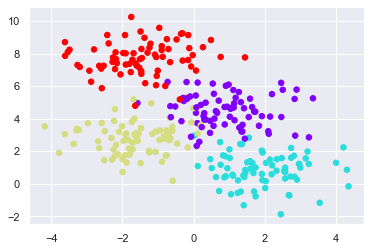

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                 random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap='rainbow');

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # рисуем обучающие точки
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap,
              clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # обучаем алгоритм
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # создаем цветной график с результатами
    n_classes = len(np.unique(y))
    contours = ax.contour(xx, yy, Z, alpha=0.7,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap = cmap, clim=(y.min(), y.max()),
                         zorder=1)
    ax.set(xlim = xlim, ylim = ylim)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'clim'


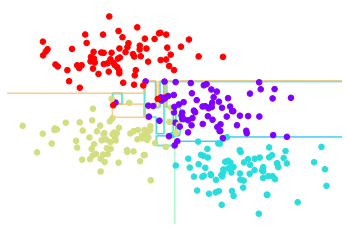

In [5]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 2, 3, 4, 5, 10, 100])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 1, 2, 5,  100]);

In [7]:
plot_tree_interactive(X, y);

interactive(children=(Dropdown(description='depth', index=4, options=(1, 2, 3, 4, 5, 10, 100), value=5), Outpu…

In [8]:
randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 1, 2, 5, 100), value=0), Output()), _do…

#### Ансамбли оценивателей: случайные леса 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'clim'


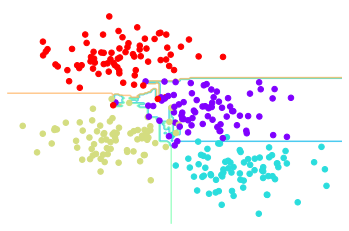

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, # каждый из 100 оценивателей учится на случайных 80 точках
                       random_state=1)
bag.fit(X, y)
visualize_classifier(bag, X, y)

### Оптимизированный (с умной стратегией разбиения) ансамбль на основе RandomForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: The following kwargs were not used by contour: 'clim'


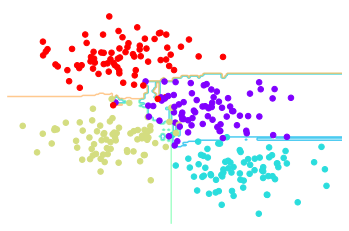

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

### Регрессия с помощью случайных лесов

In [12]:
# случайные данные из быстрых и медленных колебаний
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

In [13]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise


<ErrorbarContainer object of 3 artists>

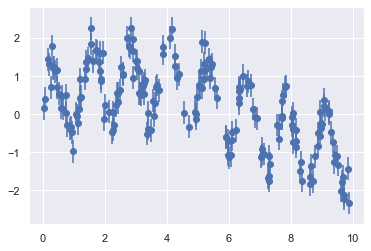

In [14]:
y= model(x)
plt.errorbar(x, y, 0.3, fmt='o')

In [15]:
y.shape

(200,)

In [16]:
# находим аппроксимацию с помощью регрессии на основе случайного леса
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [17]:
x[:, None].shape

(200, 1)

In [18]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])

In [19]:
ytrue = model(xfit, sigma=0)

In [20]:
xfit.shape

(1000,)

In [21]:
yfit.shape

(1000,)

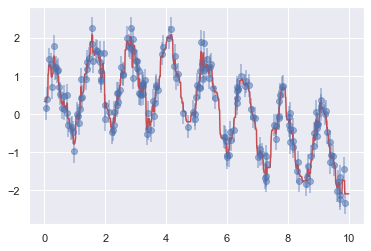

In [22]:
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
#plt.plot(xfit, ytrue, '-k', alpha=0.5);

#### Пример: использование случайного леса для классификации цифр

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

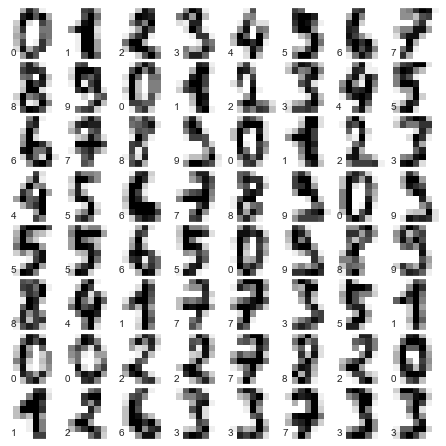

In [25]:
fig = plt.figure(figsize=(6, 6)) # размер рисунка в дюймах
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,
                   wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i])) 

In [26]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                               random_state=0)
model = RandomForestClassifier(n_estimators=1000)
%time model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Wall time: 5.25 s


In [27]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



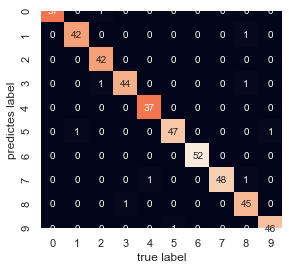

In [28]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predictes label');

### Метод главных компонент

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

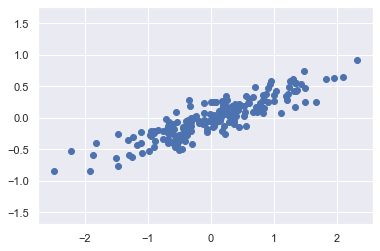

In [29]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
print('Компоненты:\n', pca.components_)
print('Объяснимая дисперсия:\n', pca.explained_variance_)

Компоненты:
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Объяснимая дисперсия:
 [0.7625315 0.0184779]


In [32]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', color='red',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

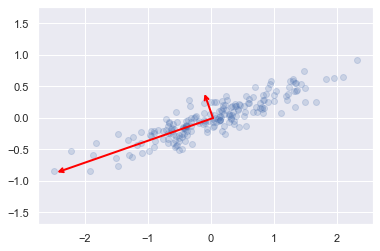

In [33]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for lenght, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(lenght)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

#### PCA как метод понижения размерности

In [34]:
# преобразуем 2-мерные данные в 1-мерные
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('Original shape: ', X.shape)
print('Transformed shape: ', X_pca.shape)

Original shape:  (200, 2)
Transformed shape:  (200, 1)


In [35]:
# выполним обратное преобразование
X_new = pca.inverse_transform(X_pca)

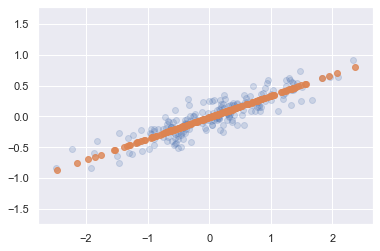

In [36]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal');

#### Использование PCA. Пример: рукописные цифры

In [37]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [38]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


''

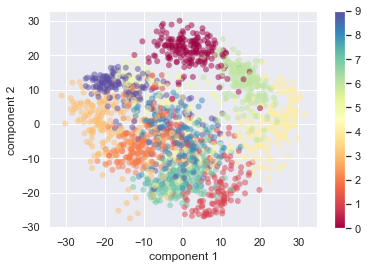

In [39]:
plt.scatter(projected[:,0], projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('Spectral', len(digits.target)))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
;

In [40]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

##### Выбор кол-ва компонент

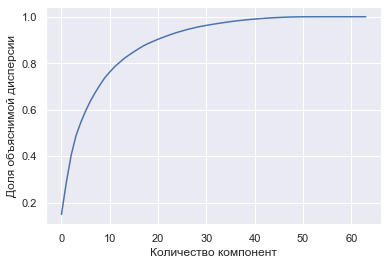

In [41]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Доля объяснимой дисперсии');

#### Использование метода PCA для фильтрации шума

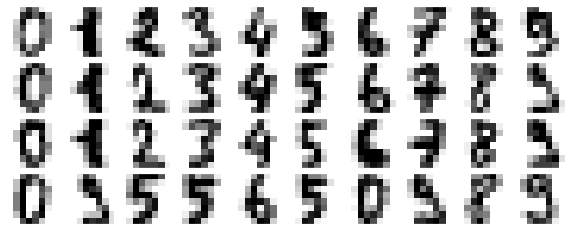

In [42]:
#  нарисуем часть незашумленных данных
def plot_digits(data):
    fig, axes = plt.subplots(4,10, figsize=(10,4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                          cmap='binary', interpolation='nearest',
                          clim=(0, 16))
plot_digits(digits.data)

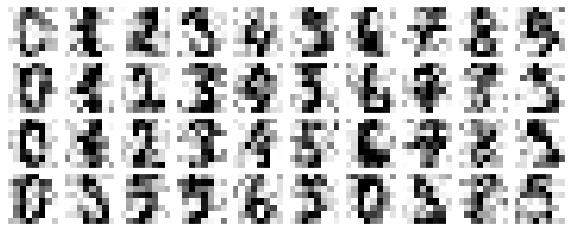

In [43]:
# добавим случайный шум
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [44]:
# обучаемся на зашумленных данных
pca = PCA(0.5).fit(noisy) # новая проекция должна содержать 50% дисперсии
pca.n_components_

12

In [45]:
print('50 % дисперсии соответствует {0} главным компонентам'.format(pca.n_components_))

50 % дисперсии соответствует 12 главным компонентам


Вычислим эти компоненты, после чего воспользуемся обратным преобразованием для восстановления отфильтрованных цифр

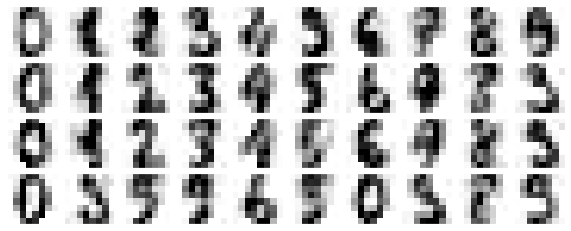

In [46]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

##### Пример: метод Eigenfaces 

In [47]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [50]:
from sklearn.decomposition import PCA as RandomizedPCA

pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

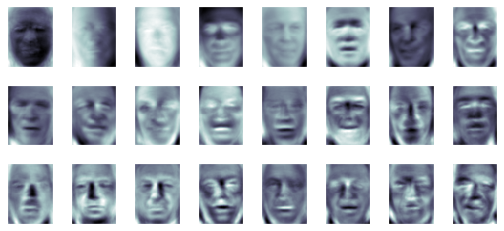

In [53]:
fig, axes = plt.subplots(3, 8, figsize=(9,4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.3, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')

Text(0, 0.5, 'Объяснимая дисперсия')

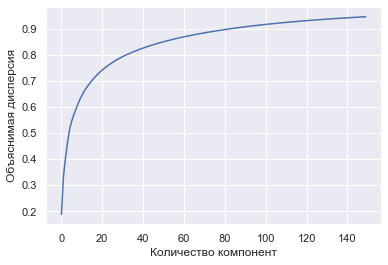

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Объяснимая дисперсия')

In [57]:
# сравним оригинал с восстановленными изображениями
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
components

array([[ 1.14302783e+03,  6.33198425e+02,  6.30193237e+02, ...,
         2.97092190e+01, -1.95589352e+01, -3.91553535e+01],
       [ 6.96565063e+02, -6.57341553e+02,  4.67288666e+02, ...,
         2.98771915e+01, -2.08107643e+01, -6.15461845e+01],
       [ 3.58944435e+01, -2.70595245e+02,  2.59385864e+02, ...,
        -1.41887760e+00,  3.67568016e+01, -2.22354870e+01],
       ...,
       [-5.50988220e+02, -7.09100098e+02,  1.28228256e+02, ...,
         4.20803452e+01,  1.02216578e+00, -6.02063751e+01],
       [-1.52816345e+03, -5.30095398e+02,  4.22976868e+02, ...,
        -4.30339432e+01, -8.70030365e+01,  1.96621704e+01],
       [ 4.93058105e+02, -1.07588844e+02,  3.57983673e+02, ...,
         4.80282898e+01,  5.50472221e+01, -3.06197014e+01]], dtype=float32)

In [58]:
projected = pca.inverse_transform(components)
projected

array([[ 1.27988174e+02,  1.25780869e+02,  1.24435593e+02, ...,
         3.59350586e+00, -3.32252502e-01, -2.22251892e-01],
       [ 4.76764679e+01,  5.69017105e+01,  7.25366135e+01, ...,
         2.41824570e+02,  2.42414673e+02,  2.41436188e+02],
       [ 8.66006088e+01,  8.42170792e+01,  7.45191650e+01, ...,
         1.24456001e+02,  1.79045746e+02,  2.12727875e+02],
       ...,
       [ 3.27627182e+01,  3.50364685e+01,  4.29486198e+01, ...,
         1.55003540e+02,  1.50097565e+02,  1.48713135e+02],
       [ 6.21792526e+01,  6.87231598e+01,  8.05021973e+01, ...,
         1.78992767e+02,  1.91267700e+02,  1.83650360e+02],
       [ 2.93993187e+01,  3.21974335e+01,  3.17458191e+01, ...,
         2.16133652e+01,  4.36370468e+01,  5.00889893e+01]], dtype=float32)

Text(0, 0.5, '150-мерная реконструкция')

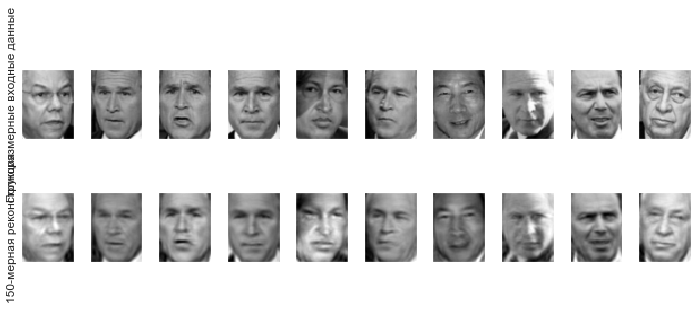

In [60]:
fig, ax = plt.subplots(2, 10, figsize=(12,4),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.3, wspace=0.3))
for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1,i].imshow(projected[i].reshape(62,47), cmap='binary_r')
ax[0,0].set_ylabel('Полноразмерные входные данные')
ax[1,0].set_ylabel('150-мерная реконструкция')